## **<font color='blue'> In this notebook you will find answers to ALL 3 EXERCISES of the assignment. They are marked "Exercise 1", "Exercise 2" and "Exercise 3" respectively. Kindly please scroll down to see them.</font>**




## **Exercise 1 - Scrapping the Wikipedia page**



#### For web scrapping I will use a Pandas built in 'read_html' solution which will scan the webisite for any table content 

In [1]:
# let's install lxml
#!pip install lxml
# first, let's import the library
import pandas as pd

In [2]:
# let's scan the wikipedia webpage and look for any table content: 
result = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')
print(result)

[    Postal Code           Borough  \
0           M1A      Not assigned   
1           M2A      Not assigned   
2           M3A        North York   
3           M4A        North York   
4           M5A  Downtown Toronto   
..          ...               ...   
175         M5Z      Not assigned   
176         M6Z      Not assigned   
177         M7Z      Not assigned   
178         M8Z         Etobicoke   
179         M9Z      Not assigned   

                                         Neighbourhood  
0                                         Not assigned  
1                                         Not assigned  
2                                            Parkwoods  
3                                     Victoria Village  
4                            Regent Park, Harbourfront  
..                                                 ...  
175                                       Not assigned  
176                                       Not assigned  
177                                      

#### As we can see, Pandas found two tables. One with 180 rows x 3 columns and another one with 4 rows x 18 columns. 
#### Since we are interested only in the first table, let's print just this one :



In [3]:
print(result[0])

    Postal Code           Borough  \
0           M1A      Not assigned   
1           M2A      Not assigned   
2           M3A        North York   
3           M4A        North York   
4           M5A  Downtown Toronto   
..          ...               ...   
175         M5Z      Not assigned   
176         M6Z      Not assigned   
177         M7Z      Not assigned   
178         M8Z         Etobicoke   
179         M9Z      Not assigned   

                                         Neighbourhood  
0                                         Not assigned  
1                                         Not assigned  
2                                            Parkwoods  
3                                     Victoria Village  
4                            Regent Park, Harbourfront  
..                                                 ...  
175                                       Not assigned  
176                                       Not assigned  
177                                       

#### Let's now convert it into a Pandas dataframe and call it 'df'

In [4]:
df = pd.DataFrame(result[0])
df.head(10)

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
7,M8A,Not assigned,Not assigned
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"


#### Let's change the names of the first and third column so that we get the exact same names as the authors of the assignment:

In [5]:
df = df.rename(columns={'Postal Code': 'PostalCode', 'Neighbourhood': 'Neighborhood'})
df.head(10)

,PostalCode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
7,M8A,Not assigned,Not assigned
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"


#### Let's get rid of the 'Not assigned' rows in the 'Borough' column

In [6]:
df.drop(df.index[df['Borough'] == 'Not assigned'], inplace = True) 

# Let's reset the index and drop the previous index

df = df.reset_index(drop=True) 

df.head(10)

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


#### Let's now verify if a column 'Neighborhood' has some 'Not assigned' rows in it


In [7]:
df.loc[df['Neighborhood'] == 'Not assigned', ['PostalCode', 'Borough', 'Neighborhood']]

,PostalCode,Borough,Neighborhood


In [8]:
print("It looks like it doesn't have any, since we didn't get any rows")

It looks like it doesn't have any, since we didn't get any rows


#### Let's check if PostalCode is unique for every row which would mean there are no duplicates

In [9]:
duplicates = df[df['PostalCode'].duplicated()]
duplicates

,PostalCode,Borough,Neighborhood


In [10]:
print("It looks like it is unique indeed, since we didn't get any rows")

It looks like it is unique indeed, since we didn't get any rows


#### Let's check how many rows are left after the cleaning

In [11]:
# let's unpack the df.shape which is a tuple
df_shape = df.shape 

"The data has {} rows, and {} columns".format(*df_shape)

'The data has 103 rows, and 3 columns'

# **Exercise 2 - Getting coordinates and creating a dataframe**



#### We want to get the coordinates for all postal codes of Toronto. Let's use the provided csv file for that

In [12]:
geospatial = pd.read_csv('../Documents/Python/Geospatial_Coordinates.csv')
geospatial

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
...,...,...,...
98,M9N,43.706876,-79.518188
99,M9P,43.696319,-79.532242
100,M9R,43.688905,-79.554724
101,M9V,43.739416,-79.588437


In [13]:
# let's rename the first column so that it exactly fits its equivalent in the second dataframe. We will need it for merging those two dataframes in a second.
geospatial = geospatial.rename(columns={'Postal Code': 'PostalCode'})
geospatial

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
...,...,...,...
98,M9N,43.706876,-79.518188
99,M9P,43.696319,-79.532242
100,M9R,43.688905,-79.554724
101,M9V,43.739416,-79.588437


#### Let's merge 'df' and 'geospatial' into one dataframe

In [14]:
df = pd.merge(left=df, right=geospatial, how='inner',on='PostalCode')
df

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509


# **Exercise 3: Clustering the neighborhoods**

### Before exploring the data, let's install and import all dependencies that we will need.

In [15]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import OneHotEncoder for preprocessing
# from sklearn.preprocessing import OneHotEncoder

# import k-means from clustering stage
from sklearn.cluster import KMeans

# import k-means evaluation metrics
from sklearn.metrics import silhouette_score

# Install and import k value evaluation metric
!pip install kneed
from kneed import KneeLocator

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


#### Let's find out how many unique values does a 'Borough' column have and what their names are:

In [16]:
print('Boroughs in Toronto:', df.Borough.unique(), end='\n \n')
print('In total:', df.Borough.nunique())

Boroughs in Toronto: ['North York' 'Downtown Toronto' 'Etobicoke' 'Scarborough' 'East York'
 'York' 'East Toronto' 'West Toronto' 'Central Toronto' 'Mississauga']
 
In total: 10


#### Let's check the types of the columns in our dataframe 'df':

In [17]:
df.dtypes

PostalCode       object
Borough          object
Neighborhood     object
Latitude        float64
Longitude       float64
dtype: object

#### Let's use geopy library to get the latitude and longitude of Toronto.

#### In order to define an instance of the geocoder, we need to define a user_agent.

#### We will name our agent 'toronto_explorer', as shown below.

In [18]:
address = 'Toronto, ON' # creating a variable and assigning address parameters to it

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Toronto are 43.6534817, -79.3839347.


#### Let's create a map of Toronto with neighborhoods superimposed on top.

In [19]:
# creating a map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

neighborhood = df['Neighborhood']
borough = df['Borough']
lat = df['Latitude']
lng = df['Longitude']

# add markers to map
for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['Borough'], df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

#### For illustration purposes, let's simplify the above map and segment and cluster <font color='purple'> only the neighborhoods located in boroughs containing the word 'Toronto'.</font> So let's slice the original dataframe, create a new one for this data and reset the index.

In [20]:
toronto_data = df[df['Borough'].str.contains('Toronto')].reset_index(drop=True)
toronto_data.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M4E,East Toronto,The Beaches,43.676357,-79.293031


#### Let's check the shape of our new dataframe 'toronto_data':

In [21]:
# let's unpack the toronto_data.shape which is a tuple
toronto_data_shape = toronto_data.shape 

"The data has {} rows, and {} columns".format(*toronto_data_shape)

'The data has 39 rows, and 5 columns'

#### As we just did with Toronto as a whole, let's now visualize Central Toronto, Downtown Toronto, East Toronto, and West Toronto and their corresponding neighborhoods.

In [22]:
# creating a map of Toronto using latitude and longitude values
boroughs_containing_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(toronto_data['Latitude'], toronto_data['Longitude'], toronto_data['Borough'], toronto_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(boroughs_containing_toronto)  
    
boroughs_containing_toronto

#### Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

#### Let's define Foursquare Credentials and Version

In [23]:
CLIENT_ID = 'H0CQQ1SICHWVXNB55VRGHUFUNBVYDQZISB1511C3SWBHEKP4' # my Foursquare ID
CLIENT_SECRET = '1YYHDQSBWI2LR3VDU45WFQ41NUQJJV3XR5R0WDYE0VPVQCP3' # my Foursquare Secret
VERSION = '20210124' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: H0CQQ1SICHWVXNB55VRGHUFUNBVYDQZISB1511C3SWBHEKP4
CLIENT_SECRET:1YYHDQSBWI2LR3VDU45WFQ41NUQJJV3XR5R0WDYE0VPVQCP3


#### Let's start exploring from the 1st neighborhood in our dataframe.
#### First, let's get the neighborhood's name:

In [24]:
toronto_data.loc[0, 'Neighborhood']

'Regent Park, Harbourfront'

#### Let's get the neighborhood's latitude and longitude values:

In [25]:
neighborhood_latitude = toronto_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = toronto_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = toronto_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Regent Park, Harbourfront are 43.6542599, -79.3606359.


#### Now, let's get the top 100 venues that are in Regent Park, Harbourfront within a radius of 500 meters.
#### In order to do that, let's create the GET request URL and let's simply name it 'url'

In [26]:
limit = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=H0CQQ1SICHWVXNB55VRGHUFUNBVYDQZISB1511C3SWBHEKP4&client_secret=1YYHDQSBWI2LR3VDU45WFQ41NUQJJV3XR5R0WDYE0VPVQCP3&v=20210124&ll=43.6542599,-79.3606359&radius=500&limit=100'

#### Let's now send the GET request and examine the resutls:

In [27]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '6011d8ca520d1f65398b7cd2'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Corktown',
  'headerFullLocation': 'Corktown, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 46,
  'suggestedBounds': {'ne': {'lat': 43.6587599045, 'lng': -79.3544279001486},
   'sw': {'lat': 43.6497598955, 'lng': -79.36684389985142}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '54ea41ad498e9a11e9e13308',
       'name': 'Roselle Desserts',
       'location': {'address': '362 King St E',
        'crossStreet': 'Trinity St',
        'lat': 43.653446723052674,
        'lng': -79.3620167174383,
        'labeledLatLngs': [{'label': 'display',
 

#### As we can see, all the information we need is in the items key. Before we proceed, let's use a function to extract the category of the venue:

In [28]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#### Now we are ready to clean the json and structure it into a pandas dataframe:

In [29]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

# let's display first five rows
nearby_venues.head()

,name,categories,lat,lng
0,Roselle Desserts,Bakery,43.653447,-79.362017
1,Tandem Coffee,Coffee Shop,43.653559,-79.361809
2,Cooper Koo Family YMCA,Distribution Center,43.653249,-79.358008
3,Body Blitz Spa East,Spa,43.654735,-79.359874
4,Impact Kitchen,Restaurant,43.656369,-79.356980


#### Let's see how many venues did Foursquare return in total?

In [30]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

46 venues were returned by Foursquare.


#### Let's create a function to repeat the same process to all the neighborhoods in our four boroughs containing 'Toronto'

In [31]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]

    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now let's write the code to run the above function on each neighborhood and create a new dataframe called containing_toronto_venues.

In [32]:
containing_toronto_venues = getNearbyVenues(names=toronto_data['Neighborhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )

Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, Parkdale Village, Exhibition Place
India Bazaar, The Beaches West
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West, Forest Hill Road Park
High Park, The Junction South
North Toronto West, Lawrence Park
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
University of Toronto, Harbord
Runnymede, Swansea
Moore Park, Summerhill East
Kensington Market, Chinatown, Grange Park
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
R

#### Let's see how our dataframe looks like:

In [33]:
# let's take a look at first five rows 
containing_toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,"Regent Park, Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,"Regent Park, Harbourfront",43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant


#### Let's check the size of the resulting dataframe

In [34]:
# let's unpack the containing_toronto_venues.shape which is a tuple
containing_toronto_venues_shape = containing_toronto_venues.shape 

"The data has {} rows, and {} columns".format(*containing_toronto_venues_shape)

'The data has 1608 rows, and 7 columns'

#### Let's check how many venues were returned for each neighborhood

In [35]:
# we actually need only one column for that: 'Neighborhood'. 
# Another one 'count' will be added automatically when running the following code
containing_toronto_venues.groupby('Neighborhood').Venue.agg(['count'])

,count
Neighborhood,
Berczy Park,56
"Brockton, Parkdale Village, Exhibition Place",22
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",16
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",16
Central Bay Street,62
Christie,16
Church and Wellesley,79
"Commerce Court, Victoria Hotel",100
Davisville,36


#### Let's find out how many unique categories can be curated from all returned venues

In [36]:
print('There are {} uniques categories.'.format(len(containing_toronto_venues['Venue Category'].unique())))

There are 235 uniques categories.


### Let's analyze each neighborhood

#### First, let's take one more look at the 'containing_toronto_venues' dataframe so that it becomes easier to notice what happened after the 'get_dummies' was applied to it

In [37]:
containing_toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,"Regent Park, Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,"Regent Park, Harbourfront",43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant


In [38]:
# one hot encoding
toronto_onehot = pd.get_dummies(containing_toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add the right 'Neighborhood' values at the beginning of the data frame
toronto_onehot.drop(['Neighborhood'], inplace = True, axis=1)
toronto_onehot.insert(0, 'Neighborhood', containing_toronto_venues['Neighborhood'])

# display the data frame to confirm that the column has been added at the beginning
toronto_onehot.head()

,Neighborhood,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Rental / Bike Share,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Yoga Studio
0,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [39]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Rental / Bike Share,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Yoga Studio
0,Berczy Park,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000000,0.000000,0.00,0.017857,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.0000,0.017857,0.035714,0.000000,0.000000,0.00,0.017857,0.017857,0.000000,0.035714,0.000000,0.000000,0.000000,0.017857,0.0000,0.000000,0.000000,0.000000,0.017857,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.017857,0.000000,0.0000,0.000000,0.035714,0.000000,0.000000,0.000000,0.000000,0.017857,0.053571,0.089286,0.00000,0.000000,0.000000,0.00000,0.00,0.000000,0.017857,0.000000,0.017857,0.000000,0.000000,0.000000,0.017857,0.000000,0.000000,0.000000,0.000000,0.017

#### Let's confirm the new size

In [40]:
toronto_grouped.shape
# as we can see, there are 39 rows and 230 columns

(39, 235)

#### Let's print each neighborhood along with the top 5 most common venues

In [41]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
                venue  freq
0         Coffee Shop  0.09
1        Cocktail Bar  0.05
2  Seafood Restaurant  0.04
3              Bakery  0.04
4      Farmers Market  0.04


----Brockton, Parkdale Village, Exhibition Place----
               venue  freq
0               Café  0.14
1     Breakfast Spot  0.09
2        Coffee Shop  0.09
3  Convenience Store  0.05
4       Intersection  0.05


----Business reply mail Processing Centre, South Central Letter Processing Plant Toronto----
                  venue  freq
0    Light Rail Station  0.12
1  Gym / Fitness Center  0.06
2         Auto Workshop  0.06
3           Pizza Place  0.06
4                  Park  0.06


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
              venue  freq
0    Airport Lounge  0.12
1   Airport Service  0.12
2  Airport Terminal  0.12
3             Plane  0.06
4           Airport  0.06


----Central Bay Street----
                ve

#### Let's put that into a Pandas dataframe, but first, let's write a function to sort the venues in descending order.

In [42]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#### Now, let's create a new dataframe and display the top 10 venues for each neighborhood.

In [43]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Beer Bar,Seafood Restaurant,Restaurant,Farmers Market,Bakery,Cheese Shop,Concert Hall,Lounge
1,"Brockton, Parkdale Village, Exhibition Place",Café,Coffee Shop,Breakfast Spot,Gym,Stadium,Burrito Place,Restaurant,Climbing Gym,Pet Store,Bakery
2,"Business reply mail Processing Centre, South C...",Light Rail Station,Garden Center,Butcher,Burrito Place,Auto Workshop,Fast Food Restaurant,Farmers Market,Garden,Restaurant,Pizza Place
3,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Lounge,Airport Service,Airport Terminal,Coffee Shop,Harbor / Marina,Plane,Rental Car Location,Sculpture Garden,Bar,Boat or Ferry
4,Central Bay Street,Coffee Shop,Café,Sandwich Place,Italian Restaurant,Salad Place,Bubble Tea Shop,Burger Joint,Yoga Studio,Ramen Restaurant,Bike Rental / Bike Share


### **Clustering the neighborhoods**
#### Now we got to the point, where we will be clustering the neighborhoods using K-means.

#### Let's try to find an optimal value for K using three different evaluation metrics:

#### Elbow method - SSE curve

In [44]:
kmeans_kwargs = {
                "init": "k-means++",
                "n_init": 12,
                "max_iter": 300,
                "random_state": 0
                }

# a for loop seems like a reasonable choice for that
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans = kmeans.fit(toronto_grouped_clustering)
    sum_of_squared_distances.append(kmeans.inertia_)

#### Now, let's plot the results of the loop

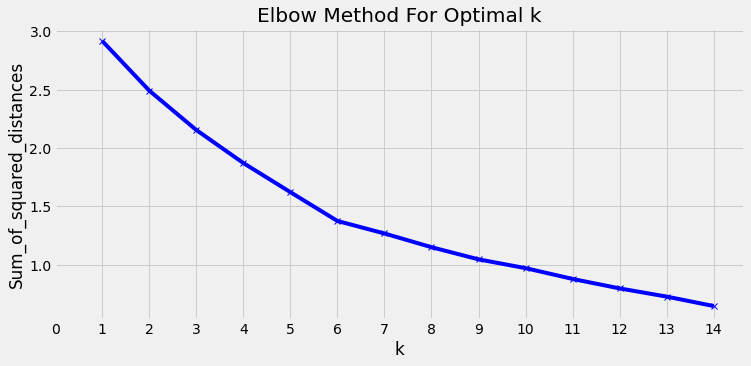

Unfortunately there is not much of an obvious elbow here, except for the k = 6, where it look at least a bit like an elbow.


In [45]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(11,5))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.xticks(np.arange(0,15,1))
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

print('\033[1m' + "Unfortunately there is not much of an obvious elbow here, except for the k = 6, where it look at least a bit like an elbow.")

#### As we can see, determining the elbow point in the SSE curve isn’t always straightforward. Since we’re having trouble choosing the elbow point of the curve, we could use a Python package, kneed, to identify the elbow point programmatically:

#### Computational Elbow Method

In [46]:
kl = KneeLocator(
                range(1, 15),
                sum_of_squared_distances,
                curve='convex',
                direction='decreasing'
                )
print('\033[1m' + 'It looks like k =', kl.elbow, 'is inded the best choice for the given dataset')

It looks like k = 6 is inded the best choice for the given dataset


#### The <font color='purple'>silhouette coefficient</font> is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors:

#### 1. How close the data point is to other points in the cluster. 
#### 2. How far away the data point is from points in other clusters. 
#### Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters.

#### In the scikit-learn implementation of the silhouette coefficient, the average silhouette coefficient of all the samples is summarized into one score. The silhouette score() function needs a minimum of two clusters, or it will raise an exception.

#### Let's loop through values of k again. This time, instead of computing 'sum_of_squared_distances', we will compute the silhouette coefficient:

#### Silhouette score

In [47]:
# the below list holds the silhouette coefficient for each k
silhouette_coefficients = []

# as we can see, we start at 2 clusters for silhouette score and not at 1
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(toronto_grouped_clustering)
    score = silhouette_score(toronto_grouped_clustering, kmeans.labels_)
    silhouette_coefficients.append(score)

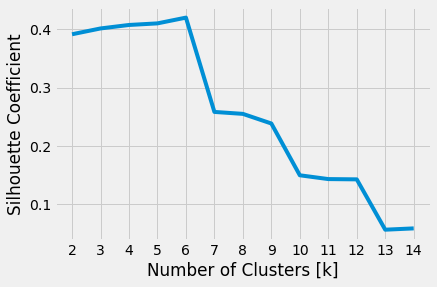

As we can see, the highest silhouette score was achieved when k = 6, 
so we once again confirmed that this is indeed the best value for the given dataset.


In [48]:
# let's plot the results
plt.style.use("fivethirtyeight")
plt.plot(range(2, 15), silhouette_coefficients)
plt.xticks(range(2, 15))
plt.xlabel("Number of Clusters [k]")
plt.ylabel("Silhouette Coefficient")
plt.show()

print('\033[1m' + 'As we can see, the highest silhouette score was achieved when k = 6, \nso we once again confirmed that this is indeed the best value for the given dataset.')

In [49]:
# let's set the number of clusters to 6 then
kclusters = 6

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, init ='k-means++', max_iter=300, n_init=12, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
print('kmeans.labels_:', kmeans.labels_[0:10])

kmeans.labels_: [0 0 0 0 0 0 0 0 0 0]


#### Let's create a new dataframe that includes the cluster labels as well as the top 10 venues for each neighborhood.

In [50]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = toronto_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # let's display first five rows

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0,Coffee Shop,Park,Bakery,Pub,Breakfast Spot,Café,Theater,Shoe Store,Brewery,Restaurant
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,0,Coffee Shop,Sushi Restaurant,Yoga Studio,Fast Food Restaurant,Restaurant,Portuguese Restaurant,Park,Nightclub,Mexican Restaurant,Japanese Restaurant
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,0,Clothing Store,Coffee Shop,Middle Eastern Restaurant,Hotel,Café,Cosmetics Shop,Bubble Tea Shop,Japanese Restaurant,Pizza Place,Italian Restaurant
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,0,Coffee Shop,Café,Gastropub,Hotel,American Restaurant,Cocktail Bar,Beer Bar,Farmers Market,Italian Restaurant,Department Store
4,M4E,East Toronto,The Beaches,43.676357,-79.293031,3,Park,Pub,Trail,Health Food Store,Distribution Center,Department Store,Dessert Shop,Diner,Discount Store,Doner Restaurant


### Finally, let's visualize the resulting clusters

In [51]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### **5. Examine Clusters**

#### Now, let's examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, let's then assign a name to each cluster.

#### Cluster 0 -  <font color='purple'>The coffee shop cluster</font>

In [52]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown Toronto,0,Coffee Shop,Park,Bakery,Pub,Breakfast Spot,Café,Theater,Shoe Store,Brewery,Restaurant
1,Downtown Toronto,0,Coffee Shop,Sushi Restaurant,Yoga Studio,Fast Food Restaurant,Restaurant,Portuguese Restaurant,Park,Nightclub,Mexican Restaurant,Japanese Restaurant
2,Downtown Toronto,0,Clothing Store,Coffee Shop,Middle Eastern Restaurant,Hotel,Café,Cosmetics Shop,Bubble Tea Shop,Japanese Restaurant,Pizza Place,Italian Restaurant
3,Downtown Toronto,0,Coffee Shop,Café,Gastropub,Hotel,American Restaurant,Cocktail Bar,Beer Bar,Farmers Market,Italian Restaurant,Department Store
5,Downtown Toronto,0,Coffee Shop,Cocktail Bar,Beer Bar,Seafood Restaurant,Restaurant,Farmers Market,Bakery,Cheese Shop,Concert Hall,Lounge
6,Downtown Toronto,0,Coffee Shop,Café,Sandwich Place,Italian Restaurant,Salad Place,Bubble Tea Shop,Burger Joint,Yoga Studio,Ramen Restaurant,Bike Rental / Bike Share
7,Downtown Toronto,0,Grocery Store,Café,Park,Nightclub,Italian Restaurant,Restaurant,Baby Store,Athletics & Sports,Candy Store,Coffee Shop
8,Downtown Toronto,0,Coffee Shop,Café,Restaurant,Thai Restaurant,Deli / Bodega,Hotel,Clothing Store,Bakery,Gym,American Restaurant
9,West Toronto,0,Pharmacy,Bakery,Supermarket,Pool,Bank,Grocery Store,Brewery,Park,Middle Eastern Restaurant,Liquor Store
10,Downtown Toronto,0,Coffee Shop,Aquarium,Café,Hotel,Scenic Lookout,Restaurant,Fried Chicken Joint,Brewery,Italian Restaurant,History Museum


#### Cluster 1 - <font color='purple'>The lawyer cluster</font>

In [53]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
29,Central Toronto,1,Lawyer,Playground,Tennis Court,Dance Studio,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant,Dog Run


#### Cluster 2 - <font color='purple'>The home service cluster</font>

In [54]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,Central Toronto,2,Home Service,Garden,Music Venue,Yoga Studio,Deli / Bodega,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant


#### Cluster 3 - <font color='purple'>The park cluster</font>

In [55]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,East Toronto,3,Park,Pub,Trail,Health Food Store,Distribution Center,Department Store,Dessert Shop,Diner,Discount Store,Doner Restaurant
33,Downtown Toronto,3,Park,Playground,Trail,Cupcake Shop,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant,Dog Run,Distribution Center


#### Cluster 4 - <font color='purple'>The Jewelry cluster</font>

In [56]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,Central Toronto,4,Jewelry Store,Trail,Mexican Restaurant,Sushi Restaurant,Yoga Studio,Department Store,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop


#### Cluster 5 - <font color='purple'>The park cluster</font>

In [57]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 5, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,Central Toronto,5,Park,Business Service,Swim School,Bus Line,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant


### Conclussion

#### It is quite hard to perform the k means clustering on this particular dataset. Even though, the applied value for k had been proven correct by three different evaluation metrics, the plotted results seem somehow unperfect since one cluster completely dominates the rest. 